# <center> Mineria de Datos: Tipos de Estrellas </center>

# Parte 1: Conocimiento del Negocio

## Introducción

El dataset que utilizaremos para las siguientes operaciones se conforma un registro de estrellas encontradas en el
espacio acompañados de sus datos mas importantes y caracteristicos. Dentro de la ciencia de la astronomia, una estrella es una esfera de gas en un estado de equilibrio entre la gravedad que tiende a comprimirla y la presión del gas, que tiende a que se expanda. Las estrellas liberan energía en su interior mediante reacciones termonucleares.

Estas varian en color, tamaño, temperatura, magnitud y variados otros atributos, que juntos le entregan a cada estrella en el universo un caracter unico, pero al mismo tiempo reconocible y comparable con otras estrellas. 

## Objetivo

El dataset presentado tendra como funcion entregarnos un registro de datos para asi estudiarlos y verificar como estos se relacionan entre si, para posteriormente poder tener la capacidad de predecir el Tipo de Estrella mediante un algoritmo en base a Python.

## Informacion del Dataset

Al ser un dataset extraido de internet (https://www.kaggle.com/datasets/deepu1109/star-dataset) los datos y parametros entregados se encuentran en ingles, por lo que ahora entregaremos los nombres de las columnas en español acompañados de su nombre original

* Absolute Temperature (in K) - **Temperatura Absoluta (en Kelvin)**
* Relative Luminosity (L/Lo) - **Luminosidad Relativa (Luminosidad de Estrella/ Luminosidad de nuestro Sol)**
* Relative Radius (R/Ro) - **Radio Relativo (Radio de Estrella/ Radio de nuestro Sol)**
* Absolute Magnitude (Mv) - **Magnitud Absoluta**
* Star Color (white,Red,Blue,Yellow,yellow-orange etc) - **Color de Estrella (Blanco, Rojo, Azul, Amarillo, Amarillo- Naranjo, etc.)**
* Spectral Class (O,B,A,F,G,K,,M) - **Clase Espectral**
* Star Type - **Tipo de Estrella (Enano Rojo, Enano Marrón, Enano Blanco, Secuencia Principal, Super Gigantes, Hiper Gigantes)**

Como se puede apreciar, se poseen variados atributos, lo que nos da la capacidad de utilizar dichos datos y poder realizar un ejercicio de prediccion que desarrollaremos mas adelante en este notebook.

## Carga de datos y visualización de datos
En esta parte de la codificación se importa Pandas, Numpy y matplotlib.pylot para usar las funciones de estas librerias con el fin de ejecutar de forma correcta nuestro dataset

In [2]:
# Importamos las funciones que utilizaremos en el desarrollo de este dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creamos un dataset con los datos de nuestro archivo CSV
data_estrella = pd.read_csv("estrellas.csv")
# Agregamos una columna Index para posteriores analisis
data_estrella = pd.concat([data_estrella],axis = 1).reset_index()
# Mostramos nuestros datos
data_estrella

,index,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,0,3068,0.002400,0.1700,16.12,0,Red,M
1,1,3042,0.000500,0.1542,16.60,0,Red,M
2,2,2600,0.000300,0.1020,18.70,0,Red,M
3,3,2800,0.000200,0.1600,16.65,0,Red,M
4,4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,238,9235,404940.000000,1112.0000,-11.23,5,White,A


La funcion de este codigo es hacer una traducción de ingles al español de las filas de la tabla.

In [4]:
# Traducir columnas
data_estrella.columns = ["index","Temperatura","Luminosidad","Radio" ,"Magnitud Absoluta","Tipo de Estrella","Color de Estrella","Clase Espectral"]

El codigo que se mostrará a continuación se muestra la informacion completa de nuestro DataSet, junto sus respectivas columnas, y su tipo de dato.

In [5]:
# Informacion del Dataset
data_estrella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              240 non-null    int64  
 1   Temperatura        240 non-null    int64  
 2   Luminosidad        240 non-null    float64
 3   Radio              240 non-null    float64
 4   Magnitud Absoluta  240 non-null    float64
 5   Tipo de Estrella   240 non-null    int64  
 6   Color de Estrella  240 non-null    object 
 7   Clase Espectral    240 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 15.1+ KB


<br>Podemos ver que poseemos un dataset de 240 registros, cada uno con 7 atributos para cada estrella registrada. 

Todos los registros detectados no encuentran valores nulos, osea no se ausenta ningun atributo de las estrellas que tenemos. Esto nos beneficia especialmente en la limpieza de datos.

A continuacion, analizaremos el atributo "Color de Estrella" dentro de nuestro dataset, ver la cantidad de estrellas de cada color y posteriormente analizar los datos mediante funciones y graficos

# Parte 2: Conocimiento de los datos

## Consulta de Negocios 1: ¿Cual es la t° promedio de las estrellas mas presentes dentro de la Clase M?

Dentro de nuestros parametros, la Clase Espectral nos da un estimado del tipo y otros valores de nuestras estrellas. Es una forma mas eficiente de clasificar estas estrellas con valores faciles de reconocer.

Durante nuestra busqueda dentro de nuestro dataset, hemos de ver como tenemos 40 estrellas para cada Tipo de Estrella:

In [6]:
data_estrella.groupby("Tipo de Estrella")["index"].nunique()

Tipo de Estrella
0    40
1    40
2    40
3    40
4    40
5    40
Name: index, dtype: int64

Pero, en cambio, la distribucion de registros en la Clase Espectral es mas dispersa:

In [7]:
data_estrella.groupby("Clase Espectral")["index"].nunique()

Clase Espectral
A     19
B     46
F     17
G      1
K      6
M    111
O     40
Name: index, dtype: int64

Por esto mismo queremos ver que tipos de estrellas podemos encontrar con mayor frecuencia en la clase mas poblada de nuestro dataset

# Parte 3: Carga y Limpieza de Datos

## Tipos de Datos de las Columnas del Dataset

A continuacion, veremos una de las columnas ingresadas en nuestro dataset, Color de Estrella.

Debido a la ausencia de un identificador unico para los registros, debemos hacer un index para navegar de mejor manera.

In [76]:
data_estrella.head(240)

,index,Temperatura,Luminosidad,Radio,Magnitud Absoluta,Tipo de Estrella,Color de Estrella,Clase Espectral
0,0,3068,0.002400,0.1700,16.12,0,Red,M
1,1,3042,0.000500,0.1542,16.60,0,Red,M
2,2,2600,0.000300,0.1020,18.70,0,Red,M
3,3,2800,0.000200,0.1600,16.65,0,Red,M
4,4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,238,9235,404940.000000,1112.0000,-11.23,5,White,A


Realicemos un "groupby.nunique()" para poder ver como se agrupan estos datos.

In [77]:
# Revisamos el conteo de los colores para corroborar
data_estrella.groupby("Color de Estrella")["index"].nunique()

Color de Estrella
Blue                   55
Blue                    1
Blue White             10
Blue white              3
Blue white              1
Blue-White              1
Blue-white             26
Orange                  2
Orange-Red              1
Pale yellow orange      1
Red                   112
White                   7
White-Yellow            1
Whitish                 2
Yellowish               1
Yellowish White         3
white                   3
yellow-white            8
yellowish               2
Name: index, dtype: int64

Como podemos ver en el resultado de la consulta anterior, se ven colores que se repiten pero son separados por la manera en las que estan escritas, por lo que tenemos que organizar los datos de manera correcta dentro del dataset original, esto con la intencion de normalizar y limpiar los datos que tenenmos para los futuros analisis.

De paso, podemos traducir los datos al idioma español para una mejor comprension de los datos.

Se realiza el cambio y a continuación se mostrará el resultado con el codigo "data_color.head(50)"

In [78]:
# Realizamos el cambio y vemos el resultado
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Red'],'Rojo')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['White'],'Blanco')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Whitish'],'Blanco')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['white'],'Blanco')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue'],'Azul')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue '],'Azul')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Yellowish'],'Amarrillento')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['yellowish'],'Amarrillento')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Yellowish White'],'Amarrillento')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['yellow-white'],'Amarrillento')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['White-Yellow'],'Amarrillento')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Orange'],'Naranja')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Orange-Red'],'Naranja')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Pale yellow orange'],'Naranja')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue White'],'Celeste')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue white'],'Celeste')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue white '],'Celeste')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue-white'],'Celeste')
data_estrella["Color de Estrella"] = data_estrella["Color de Estrella"].replace(['Blue-White'],'Celeste')

data_estrella.head(50)

,index,Temperatura,Luminosidad,Radio,Magnitud Absoluta,Tipo de Estrella,Color de Estrella,Clase Espectral
0,0,3068,0.002400,0.17000,16.120,0,Rojo,M
1,1,3042,0.000500,0.15420,16.600,0,Rojo,M
2,2,2600,0.000300,0.10200,18.700,0,Rojo,M
3,3,2800,0.000200,0.16000,16.650,0,Rojo,M
4,4,1939,0.000138,0.10300,20.060,0,Rojo,M
5,5,2840,0.000650,0.11000,16.980,0,Rojo,M
6,6,2637,0.000730,0.12700,17.220,0,Rojo,M
7,7,2600,0.000400,0.09600,17.400,0,Rojo,M
8,8,2650,0.000690,0.11000,17.450,0,Rojo,M
9,9,2700,0.000180,0.13000,16.050,0,Rojo,M


Se revisará el conteo de los colores para confirmar que están bien agrupados

In [79]:
# Revisamos el conteo de los colores para corroborar
data_estrella.groupby("Color de Estrella")["index"].nunique()

Color de Estrella
Amarrillento     15
Azul             56
Blanco           12
Celeste          41
Naranja           4
Rojo            112
Name: index, dtype: int64

En el siguiente codigo se va a graficar el resultado de "Color de estrella"

(array([112.,   0.,  41.,   0.,  12.,   0.,  15.,   0.,   4.,  56.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

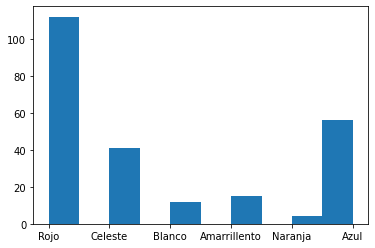

In [80]:
# Grafiquemos nuestro resultado
plt.hist(data_estrella["Color de Estrella"])

Con los colores ya traducidos y bien categorizados, hemos concluido con la limpieza de datos